In [2]:
#Подключаем библиотеки
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [3]:
#Метод для области принятия решений
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
        levels=fill_levels, colors=['cyan', 'pink', 'yellow'])
    if line:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [4]:
#Генерируем данные
X, y = make_classification(n_features=2, class_sep = 0.35, random_state = 23, n_redundant=0, n_informative=1, n_clusters_per_class=1)

In [5]:
#Выводим первые 15
print ("Координаты точек: ")
print (X[:15])
print ("Метки класса: ")
print (y[:15])

Координаты точек: 
[[-0.87764021 -0.05041774]
 [ 0.09009394 -0.38467512]
 [-0.61513498 -0.60699486]
 [ 0.54878807 -0.6155215 ]
 [-1.44383133  0.34788112]
 [ 1.1717961   0.37755454]
 [-0.19035824  0.38342108]
 [-1.90351511  0.25929552]
 [ 0.54931008 -0.52288817]
 [ 0.12374143  0.15922611]
 [-0.34236494 -0.40136135]
 [ 1.0654228  -0.34658451]
 [-0.73684211 -0.3126037 ]
 [-1.56984254 -0.66127553]
 [-0.24037977  0.26193703]]
Метки класса: 
[1 0 0 0 1 1 1 1 0 1 0 0 0 0 1]


<function matplotlib.pyplot.show(close=None, block=None)>

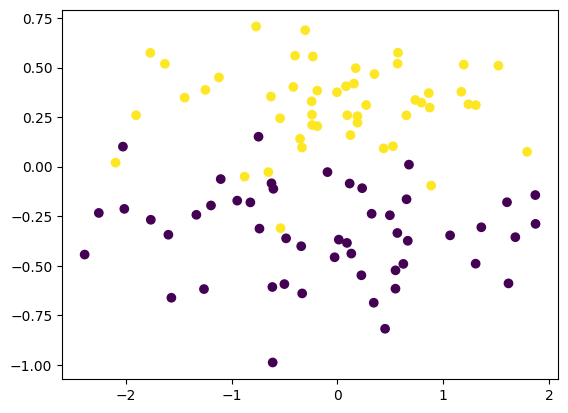

In [6]:
#Строим график по всей выборке
plt.scatter (X[:,0], X[:,1], c=y)
plt.show

In [7]:
#Делим выборку на обучающее 75 и тестовое множества 25
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.25, random_state = 1, )

<function matplotlib.pyplot.show(close=None, block=None)>

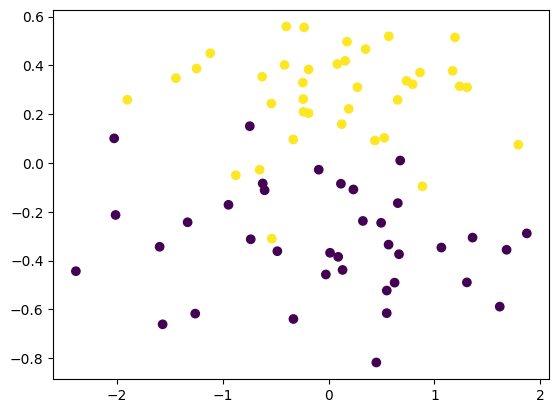

In [8]:
#Строим график обучающего множества
plt.scatter (X_train[:,0], X_train[:,1], c=y_train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

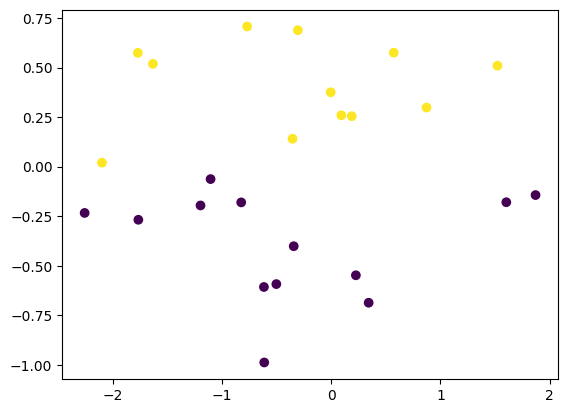

In [9]:
#Строим график тестового множества
plt.scatter (X_test[:,0], X_test[:,1], c=y_test)
plt.show

In [10]:
#Создаём переменную модель классификатора метода к-средних
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

In [11]:
#Обучаем модель по обучающему множеству
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [12]:
#Прогнозируем
prediction = knn.predict(X_test)

In [13]:
#Сравниваем прогноз и реальные данные
print ('Prediction and test: ')
print (prediction)
print (y_test)

Prediction and test: 
[1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0]
[1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0]


In [14]:
#Матрица ошибок
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))

Confusion matrix: 
[[13  0]
 [ 1 11]]


In [15]:
#Аккуратность классификации
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Accuracy score:  0.96


In [16]:
#Полнота, точность и ф1
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.92      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



In [17]:
#Значение площади под кривой ошибок
roc_auc_score(y_test, prediction)

0.9583333333333333

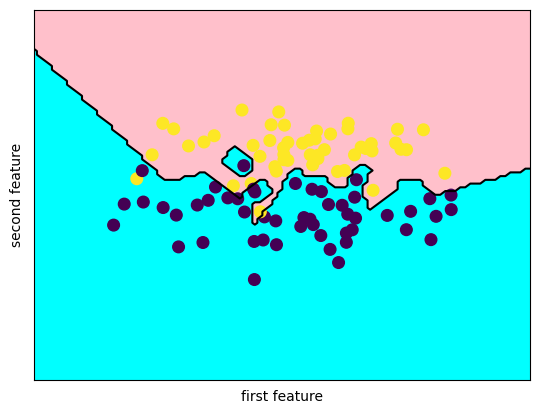

In [18]:
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

In [19]:
#Наивный байесовский классификатор
gnb = GaussianNB()

In [20]:
#Обучаем модель
gnb.fit(X_train, y_train)

GaussianNB()

In [21]:
#Прогнозируем
predictionGnb = gnb.predict(X_test)

In [22]:
#Сравниваем прогноз и реальные данные
print ('Prediction and test: ')
print (predictionGnb)
print (y_test)

Prediction and test: 
[1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0]
[1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0]


In [23]:
#Матрица ошибок
print ('Confusion matrix: ')
print (confusion_matrix(y_test, predictionGnb))


Confusion matrix: 
[[13  0]
 [ 1 11]]


In [24]:
#Аккуратность классификации
#Полнота, точность и ф1
print ('Accuracy score: ', accuracy_score(predictionGnb, y_test))
print(classification_report(y_test, predictionGnb))


Accuracy score:  0.96
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.92      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



In [25]:
#Значение площади под кривой ошибок
roc_auc_score(y_test, predictionGnb)

0.9583333333333333

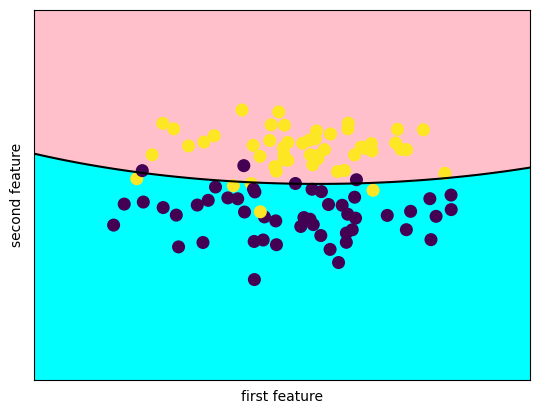

In [26]:
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(gnb, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

In [27]:
#Случайный лес
frt = RandomForestClassifier(n_estimators = 10)

In [28]:
#Обучаем модель
frt.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [29]:
#Прогнозируем
predictionFrt = frt.predict(X_test)

In [30]:
#Сравниваем прогноз и реальные данные
print ('Prediction and test: ')
print (predictionFrt)
print (y_test)

Prediction and test: 
[1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0]
[1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0]


In [31]:
#Матрица ошибок
print ('Confusion matrix: ')
print (confusion_matrix(y_test, predictionFrt))

Confusion matrix: 
[[12  1]
 [ 1 11]]


In [32]:
#Аккуратность классификации
#Полнота, точность и ф1
print ('Accuracy score: ', accuracy_score(predictionFrt, y_test))
print(classification_report(y_test, predictionFrt))

Accuracy score:  0.92
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [33]:
#Значение площади под кривой ошибок
roc_auc_score(y_test, predictionFrt)

0.9198717948717948

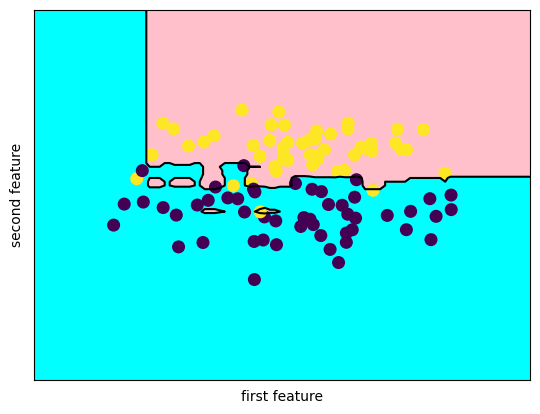

In [34]:
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(frt, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

Prediction and test: 
[1 0 0 1 1 1 1 0 0 1]
[1 0 0 1 1 1 1 0 0 1]
Confusion matrix: 
[[4 0]
 [0 6]]
Accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Prediction and test: 
[1 0 0 1 1 1 1 0 0 1]
[1 0 0 1 1 1 1 0 0 1]
Confusion matrix: 
[[4 0]
 [0 6]]
Accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Prediction and test: 
[1 0 0 1 1 0 1 0 0 1]
[1 0 0 1 1 1 1 0 0 1]
Confusion matrix: 
[[4 0]
 [1 5]]
Accu

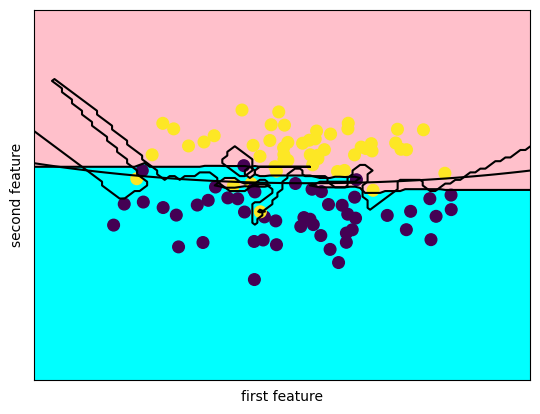

In [36]:
#Тестовая часть 10
#Делим выборку на обучающее 90 и тестовое множества 10
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.10, random_state = 1, )
#Строим график обучающего множества
plt.scatter (X_train[:,0], X_train[:,1], c=y_train)
plt.show
#Строим график тестового множества
plt.scatter (X_test[:,0], X_test[:,1], c=y_test)
plt.show
#Создаём переменную модель классификатора метода к-средних
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
#Обучаем модель по обучающему множеству
knn.fit(X_train, y_train)
#Прогнозируем
prediction = knn.predict(X_test)
#Сравниваем прогноз и реальные данные
print ('Prediction and test: ')
print (prediction)
print (y_test)
#Матрица ошибок
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
#Аккуратность классификации
print ('Accuracy score: ', accuracy_score(prediction, y_test))
#Полнота, точность и ф1
print(classification_report(y_test, prediction))
#Значение площади под кривой ошибок
roc_auc_score(y_test, prediction)
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
#Наивный байесовский классификатор
gnb = GaussianNB()
#Обучаем модель
gnb.fit(X_train, y_train)
#Прогнозируем
predictionGnb = gnb.predict(X_test)
#Сравниваем прогноз и реальные данные
print ('Prediction and test: ')
print (predictionGnb)
print (y_test)
#Матрица ошибок
print ('Confusion matrix: ')
print (confusion_matrix(y_test, predictionGnb))
#Аккуратность классификации
#Полнота, точность и ф1
print ('Accuracy score: ', accuracy_score(predictionGnb, y_test))
print(classification_report(y_test, predictionGnb))
#Значение площади под кривой ошибок
roc_auc_score(y_test, predictionGnb)
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(gnb, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
#Случайный лес
frt = RandomForestClassifier(n_estimators = 10)
#Обучаем модель
frt.fit(X_train, y_train)
#Прогнозируем
predictionFrt = frt.predict(X_test)
#Сравниваем прогноз и реальные данные
print ('Prediction and test: ')
print (predictionFrt)
print (y_test)
#Матрица ошибок
print ('Confusion matrix: ')
print (confusion_matrix(y_test, predictionFrt))
#Аккуратность классификации
#Полнота, точность и ф1
print ('Accuracy score: ', accuracy_score(predictionFrt, y_test))
print(classification_report(y_test, predictionFrt))
#Значение площади под кривой ошибок
roc_auc_score(y_test, predictionFrt)
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(frt, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

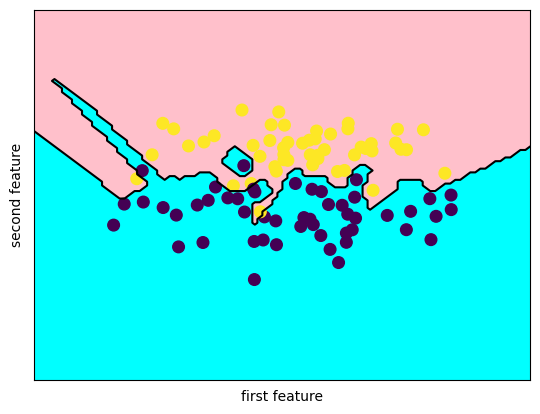

In [37]:
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

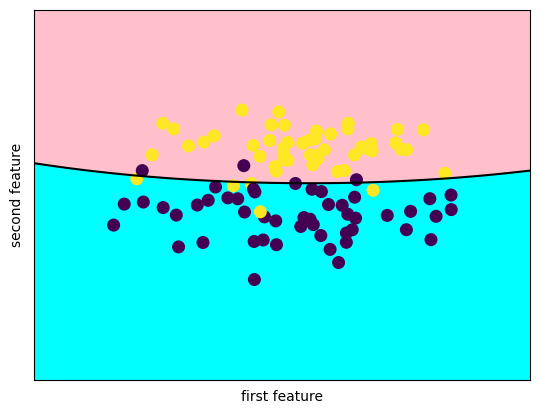

In [38]:
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(gnb, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

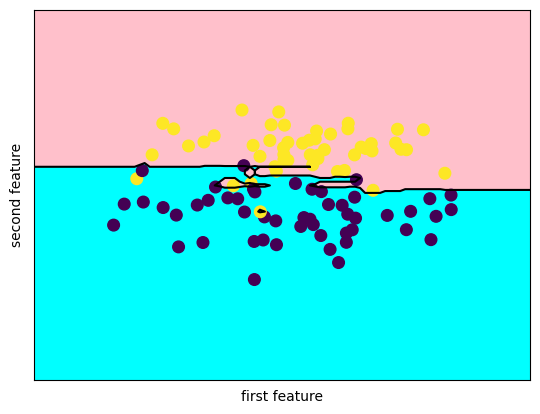

In [39]:
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(frt, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

Prediction and test: 
[1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1]
[1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1]
Confusion matrix: 
[[13  4]
 [ 2 16]]
Accuracy score:  0.8285714285714286
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.80      0.89      0.84        18

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35

Prediction and test: 
[1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1]
[1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1]
Confusion matrix: 
[[16  1]
 [ 2 16]]
Accuracy score:  0.9142857142857143
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.89      0.91        18

    accuracy                 

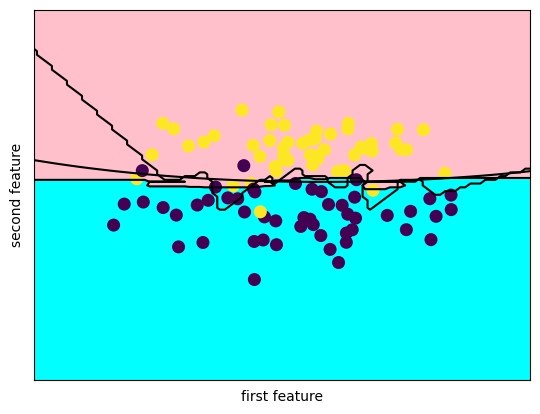

In [41]:
#Тестовая часть 10
#Делим выборку на обучающее 90 и тестовое множества 35
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.35, random_state = 1, )
#Строим график обучающего множества
plt.scatter (X_train[:,0], X_train[:,1], c=y_train)
plt.show
#Строим график тестового множества
plt.scatter (X_test[:,0], X_test[:,1], c=y_test)
plt.show
#Создаём переменную модель классификатора метода к-средних
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
#Обучаем модель по обучающему множеству
knn.fit(X_train, y_train)
#Прогнозируем
prediction = knn.predict(X_test)
#Сравниваем прогноз и реальные данные
print ('Prediction and test: ')
print (prediction)
print (y_test)
#Матрица ошибок
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
#Аккуратность классификации
print ('Accuracy score: ', accuracy_score(prediction, y_test))
#Полнота, точность и ф1
print(classification_report(y_test, prediction))
#Значение площади под кривой ошибок
roc_auc_score(y_test, prediction)
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
#Наивный байесовский классификатор
gnb = GaussianNB()
#Обучаем модель
gnb.fit(X_train, y_train)
#Прогнозируем
predictionGnb = gnb.predict(X_test)
#Сравниваем прогноз и реальные данные
print ('Prediction and test: ')
print (predictionGnb)
print (y_test)
#Матрица ошибок
print ('Confusion matrix: ')
print (confusion_matrix(y_test, predictionGnb))
#Аккуратность классификации
#Полнота, точность и ф1
print ('Accuracy score: ', accuracy_score(predictionGnb, y_test))
print(classification_report(y_test, predictionGnb))
#Значение площади под кривой ошибок
roc_auc_score(y_test, predictionGnb)
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(gnb, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
#Случайный лес
frt = RandomForestClassifier(n_estimators = 10)
#Обучаем модель
frt.fit(X_train, y_train)
#Прогнозируем
predictionFrt = frt.predict(X_test)
#Сравниваем прогноз и реальные данные
print ('Prediction and test: ')
print (predictionFrt)
print (y_test)
#Матрица ошибок
print ('Confusion matrix: ')
print (confusion_matrix(y_test, predictionFrt))
#Аккуратность классификации
#Полнота, точность и ф1
print ('Accuracy score: ', accuracy_score(predictionFrt, y_test))
print(classification_report(y_test, predictionFrt))
#Значение площади под кривой ошибок
roc_auc_score(y_test, predictionFrt)
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(frt, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

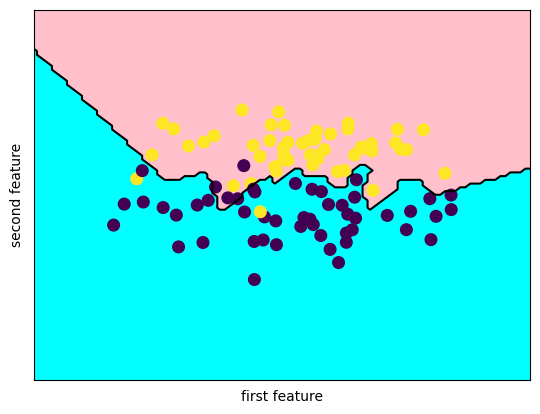

In [42]:
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

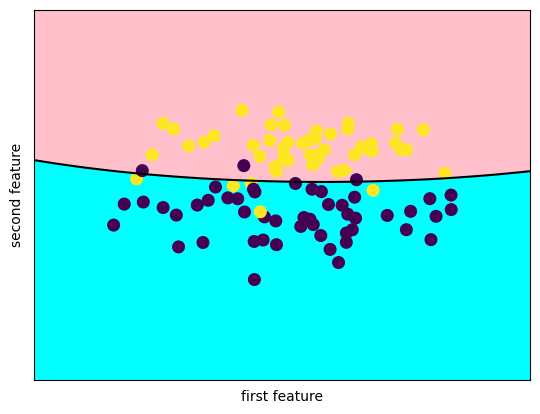

In [43]:
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(gnb, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

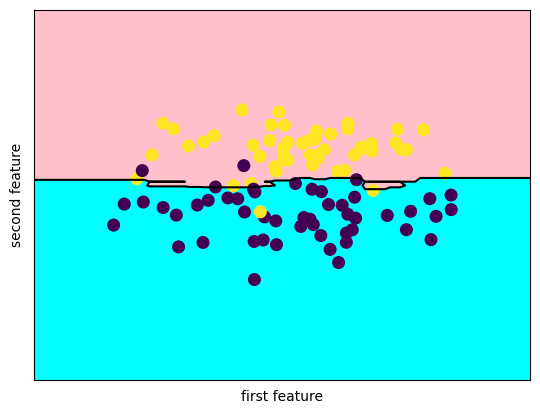

In [44]:
#Область принятия решений
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(frt, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)